In [1]:
from torchvision import transforms as tfs
from torch.utils import data
import PIL.ImageOps
from utils import CustomDataGANV4 as cdata
import numpy as np
from utils import utils
import os
import pickle
from utils import Discriminator as netD
from utils import Generator as netG
import torch.nn as nn
import torch.optim as optim
import torch
from utils.Plotter import VisdomLinePlotter
import tqdm
from scipy import stats
import cv2

In [2]:
available_device = 'cuda'

transformations = [
                   #tfs.RandomHorizontalFlip(p=0.7), 
                   #tfs.RandomAffine(0, scale=(0.7, 1.), fillcolor=(255, 255, 255)), 
                   #tfs.RandomRotation((0,360), fill=(255,255, 255)), 
                   tfs.Grayscale(),
                   #tfs.RandomRotation(degrees=(0,45), fill=(255,)),
                   tfs.Resize((128, 128)),
                   tfs.Lambda(lambda x: PIL.ImageOps.invert(x)),
                   tfs.ToTensor()
]

In [3]:
# Model Initialization
model_G = netG.Generator(nc_input=2, nc_output=1).to(available_device)
checkpoint = torch.load("models/generador_v9_current_5000.pkl")
model_G.load_state_dict(checkpoint)
model_G = model_G.eval()

#checkpoint = torch.load("models/generador_v6c_5000.pkl")
#checkpoint = torch.load("models/generador_v6_5000.pkl")
#checkpoint = torch.load("models/generador_v7_5000.pkl")
model_G1 = netG.Generator(nc_input=2, nc_output=1).to(available_device)
checkpoint = torch.load("models/generador_v1_current_5000.pkl")
model_G1.load_state_dict(checkpoint)
model_G1 = model_G1.eval()



In [4]:
import matplotlib.pyplot as plt

In [5]:
def imshow_msk(imgs, k):
    plt.figure(figsize=(12,5))
    #titles = ['Input 0', 'Input 1', 'Result', 'Target', 'Position']
    titles = ['ind - {}: Input 0'.format(k), 'Result', 'Position']
    for i in range(0,3):
        plt.subplot(1, 5, i+1)
        plt.imshow(imgs[i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[i])
    
    cv2.imwrite('rs.png', np.abs((imgs[2]*255)-255))
   
    


In [6]:
from PIL import Image

In [7]:
#img = Image.open('romanas/2446_1_03_03_02.png')
img = Image.open('romanas/romana_v2_v3.png')

In [8]:
tf = tfs.Compose(transformations)

In [9]:
tope = tf(img).to(available_device)
blacks = torch.zeros_like(tope).to(available_device)
origin_A = torch.cat((tope, blacks), 0)

In [10]:
origin_A = origin_A.unsqueeze(0)

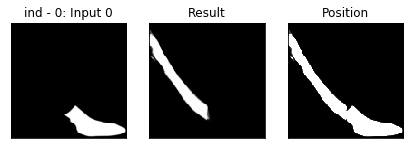

In [11]:
predicted_A = model_G(origin_A).squeeze(0)

predicted_plus_tope = tope + predicted_A
predicted_plus_tope[predicted_plus_tope>0.5] = 1
imgs = torch.cat((tope, predicted_A, predicted_plus_tope), 0)
imshow_msk(imgs.detach().cpu().numpy(), 0)